<a href="https://colab.research.google.com/github/Kushdevu/Linear-Regression_Retail_Sales_Prediction/blob/main/Linear_Regression_Retail_Sales_Prediction_Assessment_Devendra_Kushwah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name- SalesForecastX

Done by- Devendra Kushwah

# Problem Statement
The task at hand is to develop a predictive model that accurately forecasts the sales of various products within a big market. The predictive model aims to assist market management in making informed decisions regarding inventory management, resource allocation, and strategic planning to optimize sales and enhance overall profitability.

# Objective:

The primary objective of this project is to develop a machine learning model capable of accurately predicting the sales volume of different products within the big market. This predictive model will leverage historical sales data along with other relevant features such as product attributes, store information, promotional activities, and seasonal trends to generate reliable sales forecasts.

Dataset Link : https://drive.google.com/file/d/13kDnO8ncTyIpP84LLg3kLjUHbaXev0x7/view?usp=sharing

In [ ]:
Github Link :

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Data Collection and analysis

In [10]:
# Data Collection and analysis
# Loading the dataset
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 6/Mid Course Assessment 6/sales_prediction.csv')

In [11]:
# Overview of a dataframe
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
# Number of rows and column
sales_data.shape

(8523, 12)

In [14]:
# Info about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

Item_Identifier

Item_Fat_Content

Item_Type

Outlet_Identifier

Outlet_Size  

Outlet_Location_Type

Outlet_Type


In [15]:
# Checking for missing values
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Handling missing values


In [16]:
# Impute missing values for 'Item_Weight' with the mean
mean_item_weight = sales_data['Item_Weight'].mean()
sales_data['Item_Weight'].fillna(mean_item_weight, inplace=True)

# Impute missing values for 'Outlet_Size' with the mode
mode_outlet_size = sales_data['Outlet_Size'].mode()[0]
sales_data['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

# Verify if there are any remaining missing values
print(sales_data.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [27]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
# Statistical measures about the data
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Exploratory Data Analysis (EDA)

#####Histogram for Numeric Features:

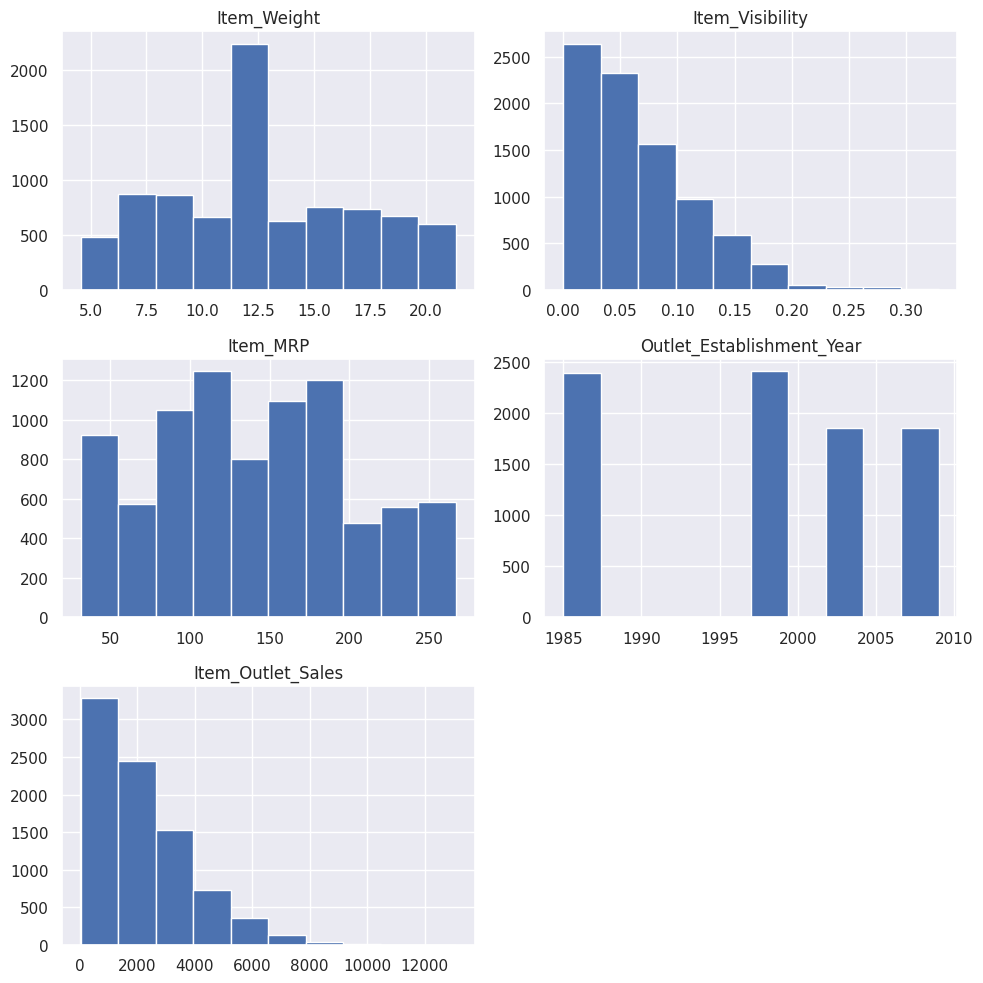

In [20]:
# Histogram for numeric features
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
sales_data[numeric_features].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

##### Boxplot for Numeric Features:

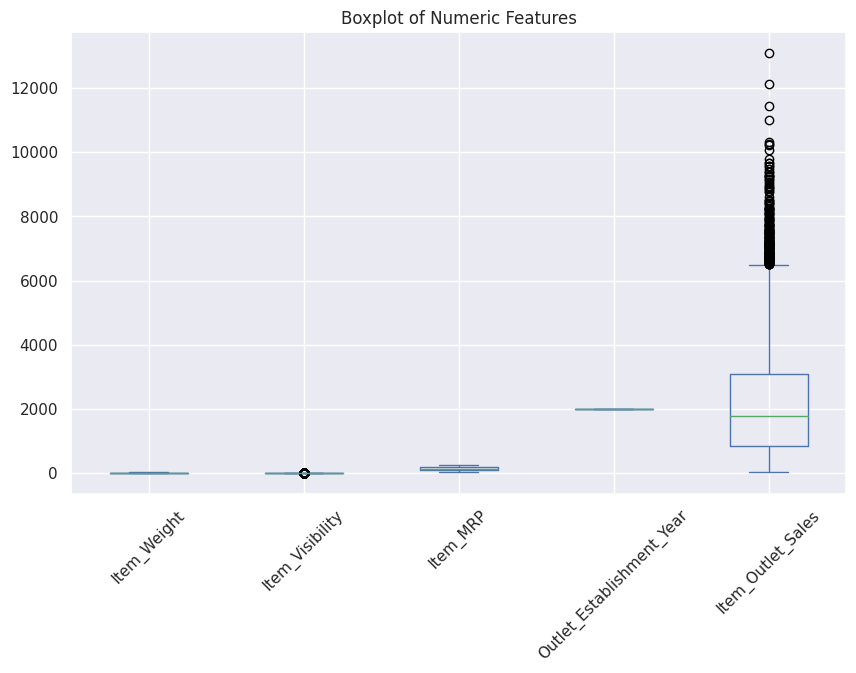

In [21]:
# Boxplot for numeric features
sales_data[numeric_features].plot(kind='box', figsize=(10, 6))
plt.title('Boxplot of Numeric Features')
plt.xticks(rotation=45)
plt.show()

Bar Plot for Categorical Features:

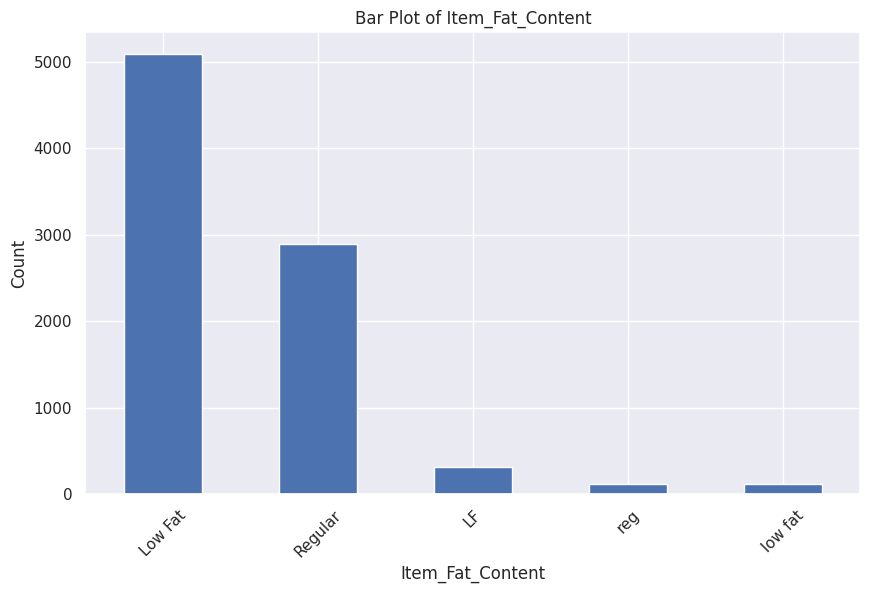

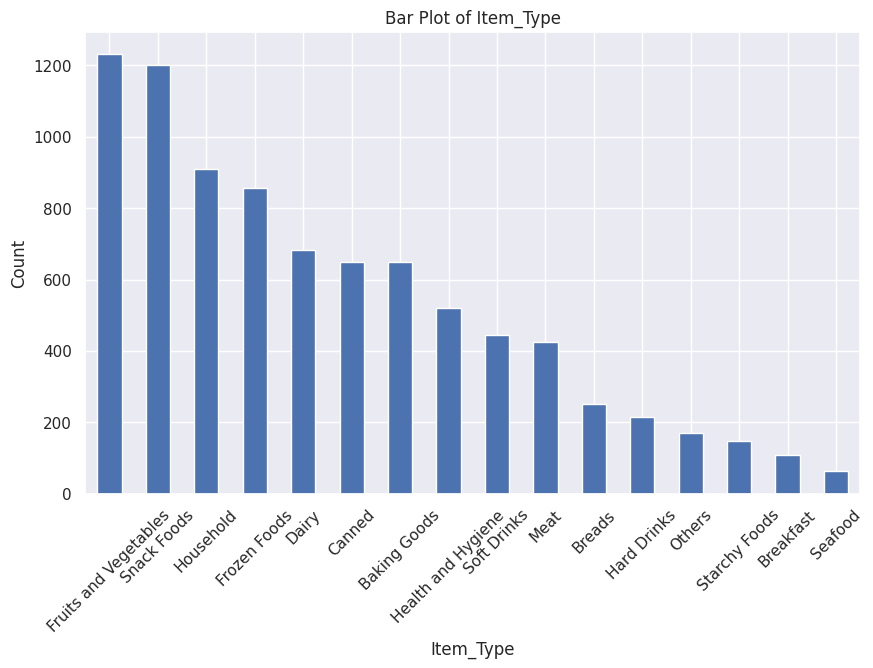

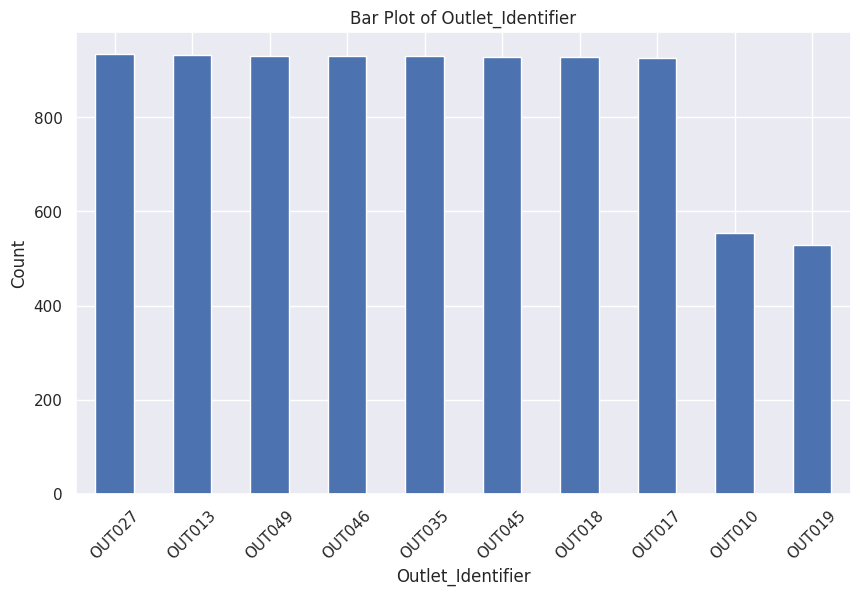

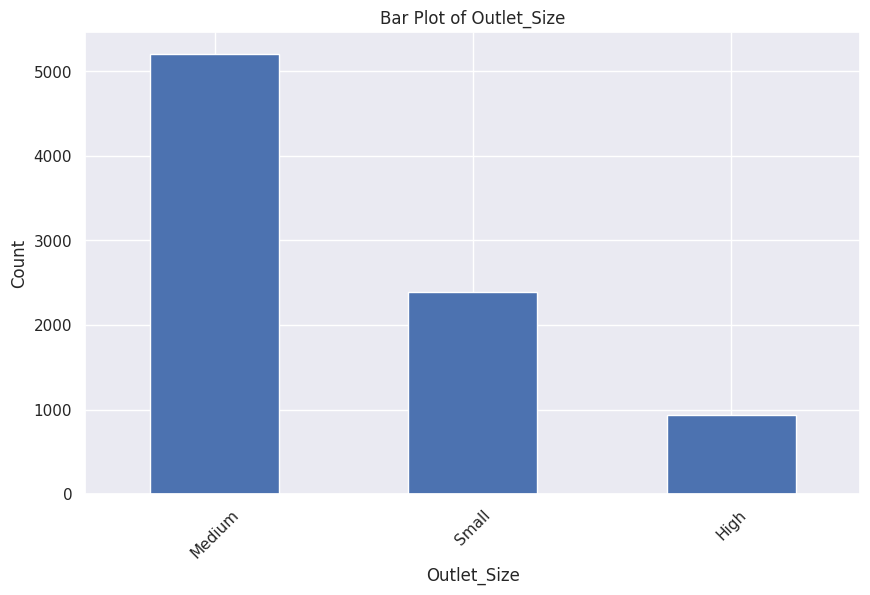

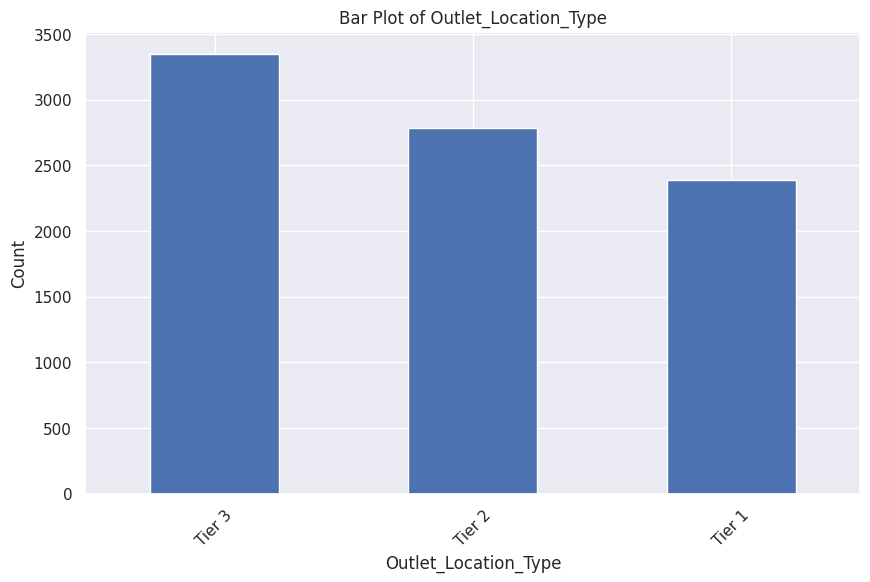

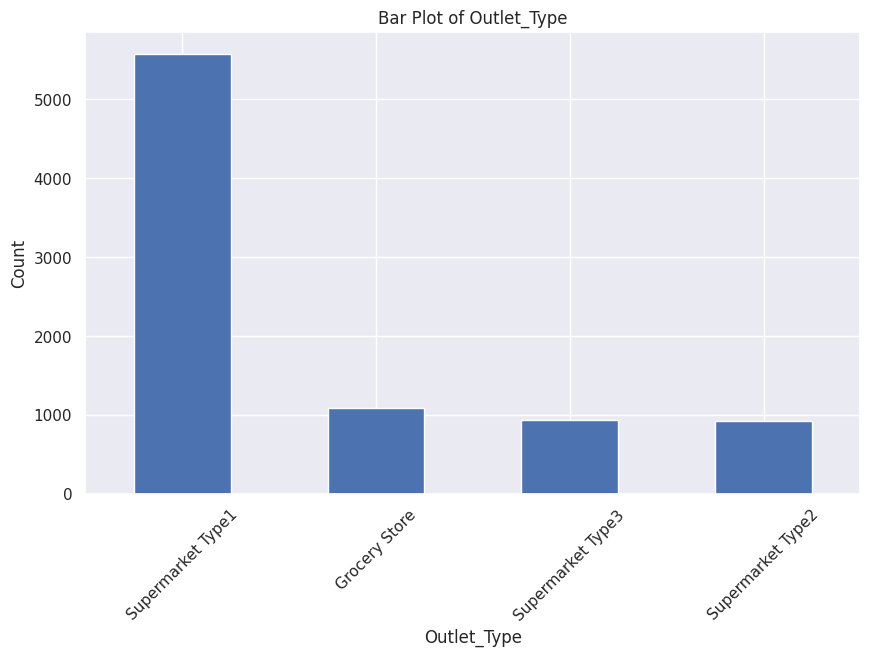

In [22]:
# Bar plot for categorical features
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sales_data[feature].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


##### Correlation Heatmap:

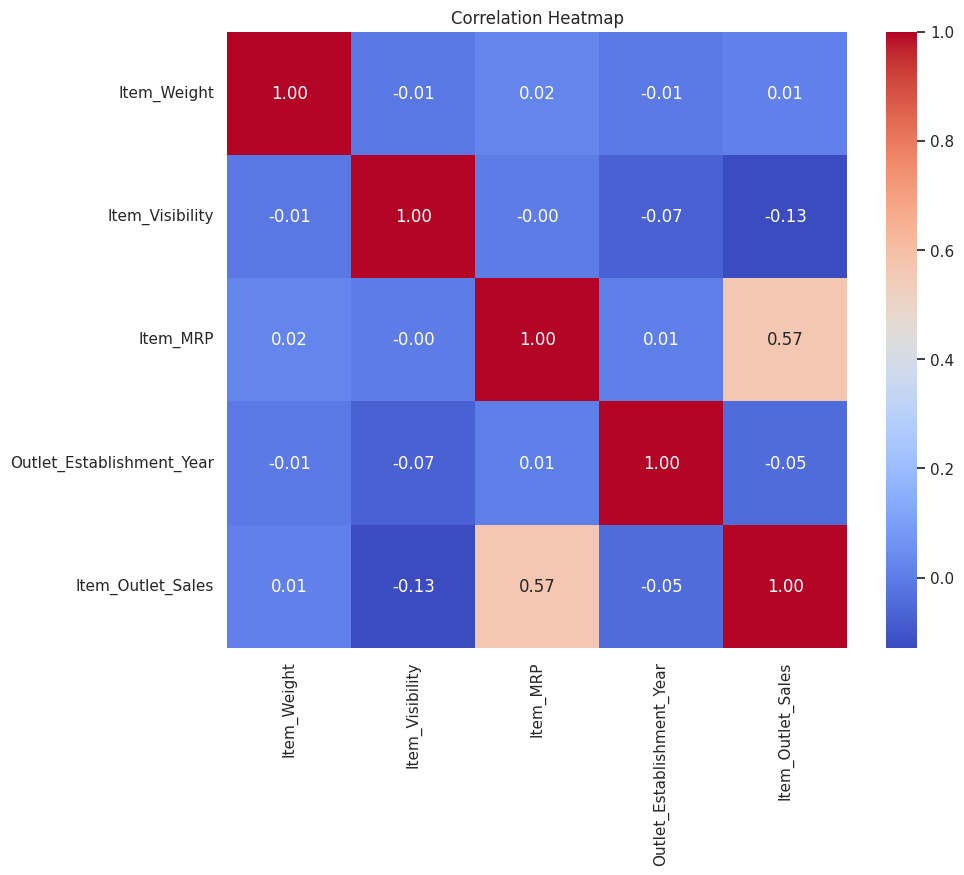

In [25]:
# Exclude non-numeric columns before computing correlation
numeric_data = sales_data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


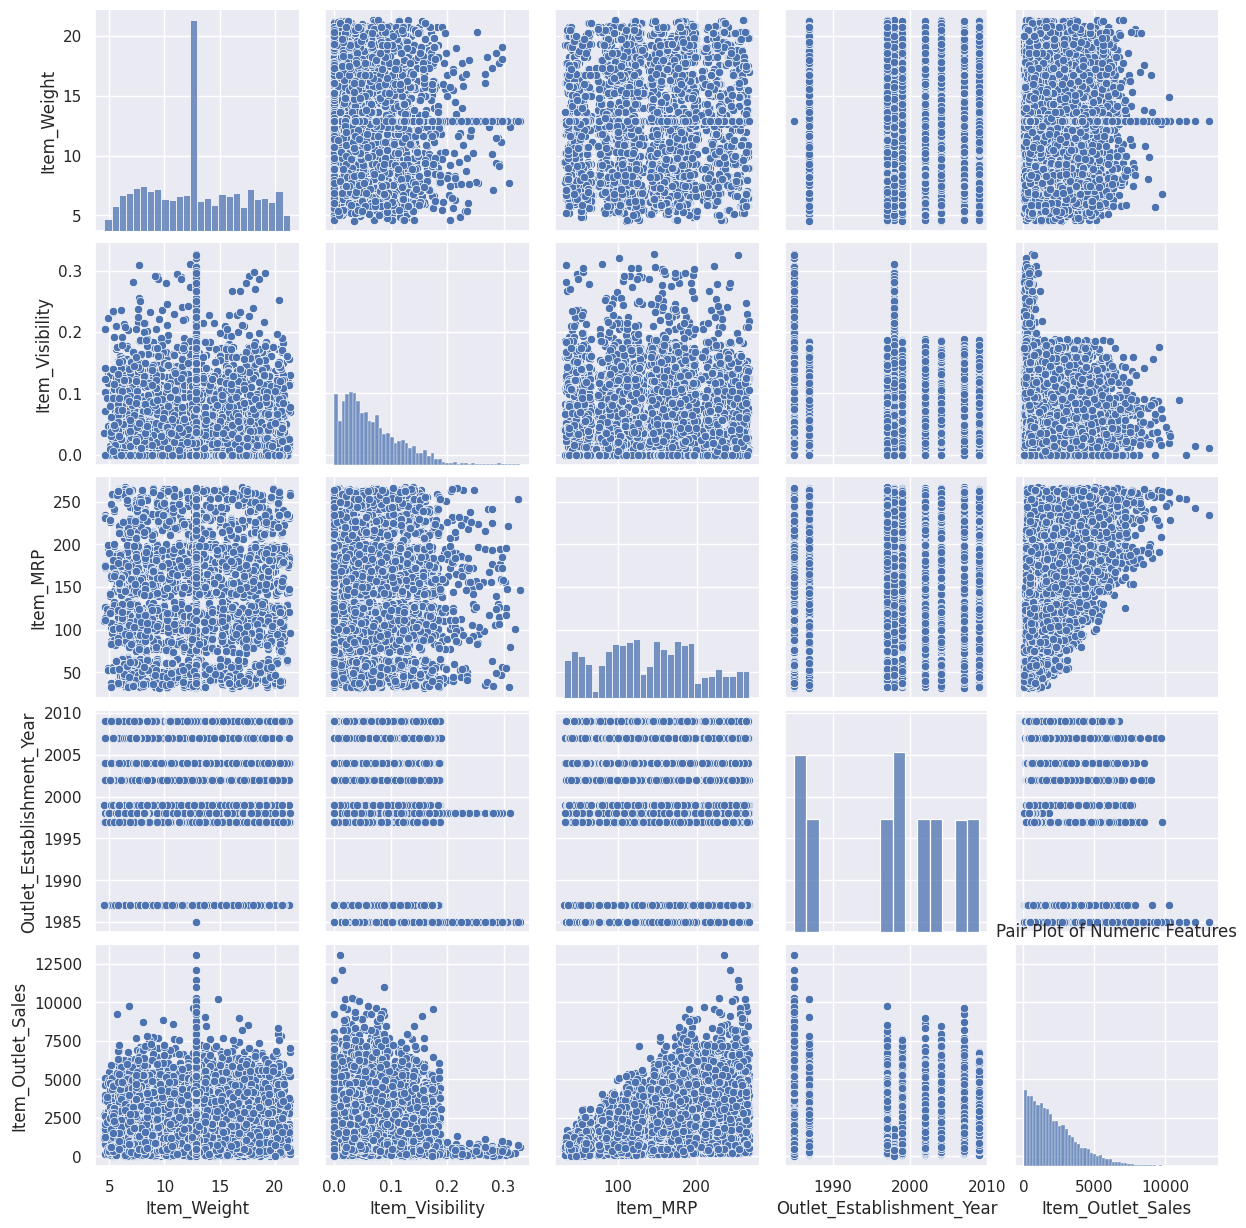

In [26]:
# Pair plot for numeric features
sns.pairplot(sales_data[numeric_features])
plt.title('Pair Plot of Numeric Features')
plt.show()


#### Preprocessing Task Before Model Building

1. Encoding Categorical Variables:

In [29]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    label_encoders[column] = LabelEncoder()
    sales_data[column] = label_encoders[column].fit_transform(sales_data[column])


2. Scaling Numeric Features:

In [30]:
# Scaling numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
sales_data[numeric_features] = scaler.fit_transform(sales_data[numeric_features])


#### Train and test Model Selection, Training & Evaluation

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
# Splitting the data into features and target variable
X = sales_data.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
y = sales_data['Item_Outlet_Sales']

In [33]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
# Predicting on the test set
y_pred = model.predict(X_test)


In [37]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [38]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1293080.077374616
Mean Absolute Error (MAE): 856.4053553869352
R-squared (R2) Score: 0.5242478593650526


Mean Squared Error (MSE): The MSE value of approximately 1,293,080 indicates the average squared difference between the predicted sales values and the actual sales values. A lower MSE value indicates better model performance.

Mean Absolute Error (MAE): The MAE value of approximately 856.41 represents the average absolute difference between the predicted sales values and the actual sales values. A lower MAE value suggests better model accuracy.

R-squared (R2) Score: The R-squared value of approximately 0.524 indicates that the model explains around 52.42% of the variance in the sales data. This value ranges from 0 to 1, where higher values represent better fit of the model to the data.

# Conclusion
Objective Achievement: The primary objective of developing a machine learning model to accurately forecast sales volumes of various products within the big market has been partially achieved. The model provides insights into potential sales trends and patterns, aiding in inventory management, resource allocation, and strategic planning.

Model Performance: The linear regression model achieved moderate performance, as indicated by the evaluation metrics. While the model explains a significant portion of the variance in sales data (52.42% R-squared score), there is room for improvement in reducing mean squared error and mean absolute error.
Recommendations for Improvement: To enhance the predictive accuracy and effectiveness of the model, several avenues can be explored:

Feature Engineering: Incorporating additional relevant features or engineering new features may capture more nuanced relationships in the data.
Advanced Modeling Techniques: Experimenting with more complex algorithms such as decision trees, random forests, or gradient boosting can potentially capture nonlinear relationships in the data.

Hyperparameter Tuning: Fine-tuning model parameters through grid search or randomized search can optimize model performance.

Cross-Validation: Implementing cross-validation techniques can provide a more robust estimate of model performance and reduce overfitting.

Ensemble Methods: Combining predictions from multiple models through ensemble methods like stacking or blending may lead to better overall performance.

Business Insights: Despite the current model's limitations, valuable insights can still be gleaned from the analysis. Market management can use the model's predictions to anticipate demand fluctuations, identify high-performing products, optimize promotional strategies, and allocate resources more effectively.

Future Directions: Continuing to refine and iterate on the predictive model based on real-time data updates and feedback will be crucial for maintaining its relevance and effectiveness over time. Additionally, exploring external factors such as economic indicators, seasonal trends, and competitor activities can further enrich the predictive capabilities of the model.